In [1]:
# 1: Import Library :
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
# 2 : Read the dataset using pandas :
df = pd.read_csv("titanic.csv",sep = ';')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [3]:
# 3 : Extraction the missing values :
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
# 4 : Fill the missing values in "Age" column :
df['Age'].fillna(df['Age'].mean(),inplace = True)
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
# 5 : Fill the missing values in "Cabin" column :
df['Cabin'].fillna('A5',inplace = True)
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

In [6]:
# 6 : Fill the missing values in "Embarked " column :
df['Embarked'].fillna('S',inplace = True)
df.isnull().sum()  # Now there is no missing values in the dataset

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

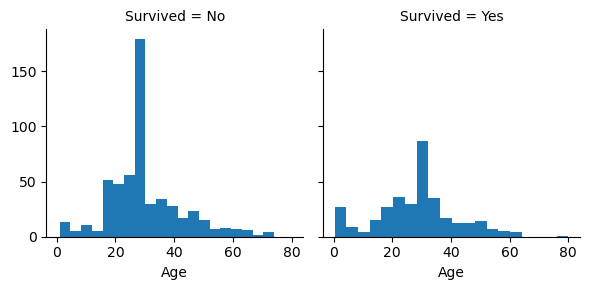

In [7]:
# 7 : Visualizate the Survivors depending on "Age" :
a = sb.FacetGrid(df,col="Survived")
a.map(plt.hist,'Age',bins=20)
plt.show()

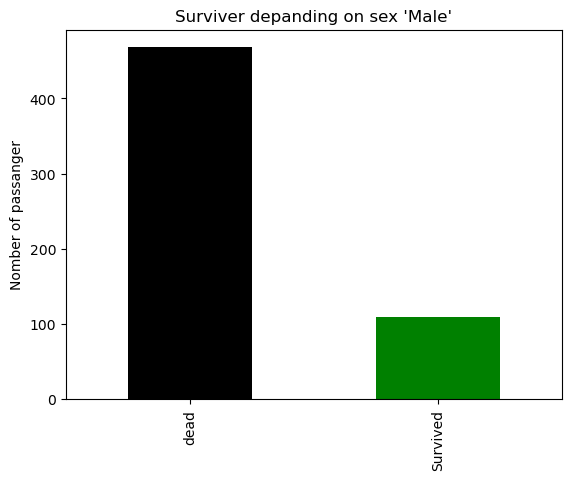

In [8]:
# 8 : Visualizate the Survivors depending on sex male :
m = df[df ["Sex"]=="male"]["Survived"].value_counts().plot(kind = 'bar', color = ['black','green'])
m.set_xticklabels(["dead","Survived"])
m.set(ylabel = "Nomber of passanger")
plt.title("Surviver depanding on sex 'Male'")
plt.show()

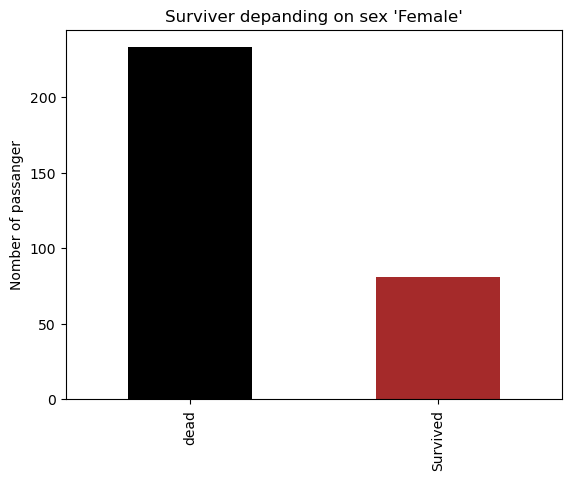

In [9]:
# 8-2 : Visualizate the Survivors depending on sex female :
f = df[df ["Sex"]=="female"]["Survived"].value_counts().plot(kind = 'bar', color = ['black','brown'])
f.set_xticklabels(["dead","Survived"])
f.set(ylabel = "Nomber of passanger")
plt.title("Surviver depanding on sex 'Female'")
plt.show()

In [25]:
def plot_correlation_map(df):
    corr = df.corr() 
    s , ax = plt.subplots(figsize =(12,10))
    cmap = sb.diverging_palette( 220 , 10 , as_cmap = True )
    s = sb.heatmap(corr, cmap = cmap,square=True, cbar_kws={'shrink' :.9},ax=ax, annot = True, 
                    annot_kws = {'fontsize' : 12 })
plot_correlation_map(df)

"""As i notice there is a relation between all the variable , The color is gradient depending of the value , if it's negative 
it's on dark blue and it's change until positive value the color it's red (using the bar next to the matrix)"""

"As i notice there is a relation between all the variable , The color is gradient depending of the value , if it's negative \nit's on dark blue and it's change until positive value the color it's red (using the bar next to the matrix)"

In [11]:
# 10 : Use the groupby function combined with the mean() to view the relation between Pclass and survived 
gro = df.groupby(['Survived'])['Pclass'].mean()
print(gro)

Survived
No     2.531876
Yes    1.950292
Name: Pclass, dtype: float64


In [12]:
# 11 : Drop the useless columns   ("Name",'Cabin')
df = df.drop(['Name','Cabin'],axis=1)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,No,2,male,28.0,0,0,248740,13.0000,S
1,76,No,3,male,25.0,0,0,348123,7.6500,S
2,641,No,3,male,20.0,0,0,350050,7.8542,S
3,568,No,3,female,29.0,0,4,349909,21.0750,S
4,672,No,1,male,31.0,1,0,F.C. 12750,52.0000,S


In [13]:
""" 12 :  Creat a new column called "Title" from the "Name" column (we need to go back to the original dataset cause we need
"Name" column to extract the 'Title' column then We drop it again)"""

df = pd.read_csv("titanic.csv",sep = ';')
df['Title'] = df['Name'].str.extract(r',\s*([^\.]+)\s*\.', expand=False)
# change the place of the 'Title' column 
t = df.columns.tolist()
t.insert(3,t.pop(t.index('Title')))
df = df[t]
# drop the "Name" column  after we extract the "Title" column ("Cabin" column is useless )
df = df.drop(['Name','Cabin'],axis=1)
df['Age'].fillna(df['Age'].mean(),inplace = True)
df['Embarked'].fillna('S',inplace = True)
df.head()

,PassengerId,Survived,Pclass,Title,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,No,2,Mr,male,28.0,0,0,248740,13.0000,S
1,76,No,3,Mr,male,25.0,0,0,348123,7.6500,S
2,641,No,3,Mr,male,20.0,0,0,350050,7.8542,S
3,568,No,3,Mrs,female,29.0,0,4,349909,21.0750,S
4,672,No,1,Mr,male,31.0,1,0,F.C. 12750,52.0000,S


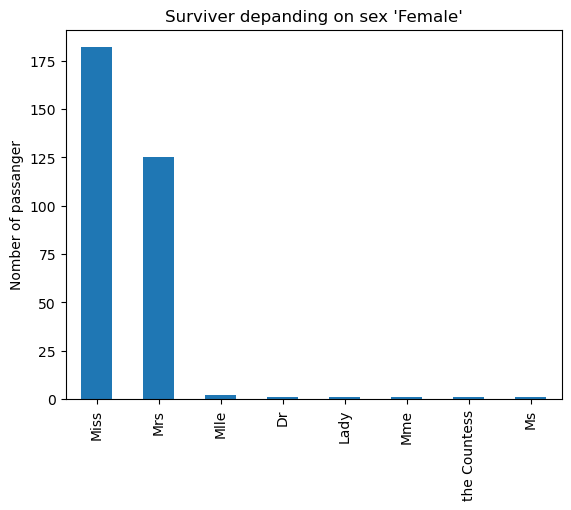

In [24]:
# 13-1 : Visualize the correlation between Title and Sex:
f = df[df ["Sex"]=="female"]["Title"].value_counts().plot(kind = 'bar')
f.set(ylabel = "Nomber of passanger")
plt.title("Surviver depanding on sex 'Female'")
plt.show()

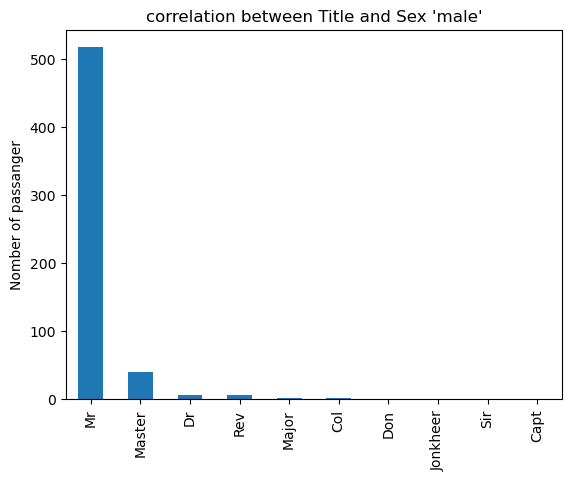

In [15]:
# 13-2 : Visualize the correlation between Title and Sex:
f = df[df ["Sex"]=="male"]["Title"].value_counts().plot(kind = 'bar')
f.set(ylabel = "Nomber of passanger")
plt.title("correlation between Title and Sex 'male'")
plt.show()

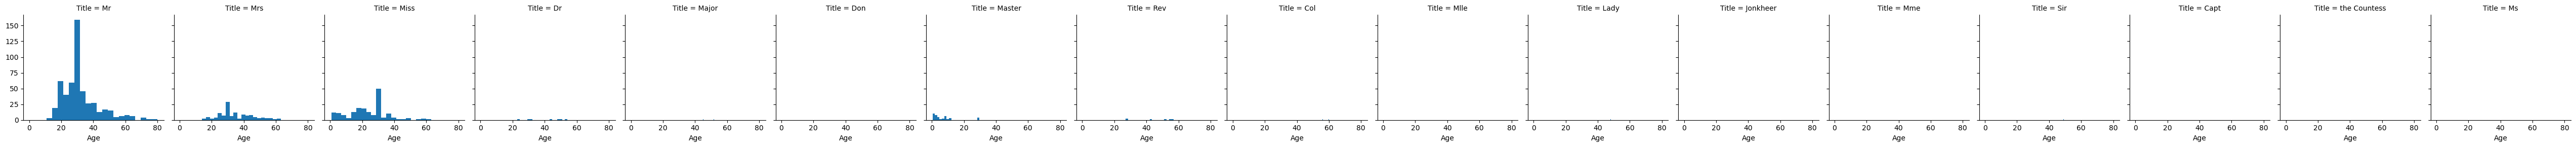

In [16]:
# 13-3 :  Visualize the correlation between Title and Age :
b = sb.FacetGrid(df,col="Title")
b.map(plt.hist,'Age',bins=20)
plt.show()

In [17]:
# 14 : Group Titles into more useful ones :

TD = {"Capt":"Officer","Col":"Officer","Major":"Officer","Dr":"Officer","Rev":"Officer","Jonkheer":"Royalty",
      "Don":"Royalty","Sir" :"Royalty","Lady":"Royalty","the Countess": "Royalty","Dona":"Royalty","Mme":"Miss",
      "Mlle":"Miss","Miss" :"Miss","Ms":"Mrs","Mr" :"Mrs","Mrs" :"Mrs","Master" :"Master"}
df["Title"] = df["Title"].replace(TD.keys())
df.head()
#print(df.iloc[689]["Title"])

,PassengerId,Survived,Pclass,Title,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,No,2,Mr,male,28.0,0,0,248740,13.0000,S
1,76,No,3,Mr,male,25.0,0,0,348123,7.6500,S
2,641,No,3,Mr,male,20.0,0,0,350050,7.8542,S
3,568,No,3,Mrs,female,29.0,0,4,349909,21.0750,S
4,672,No,1,Mr,male,31.0,1,0,F.C. 12750,52.0000,S


In [18]:
# 15 : Create a new feature "FamilySize" using the tow columns "Parch" and "SibSp" :
df["FamilySize"] = df["Parch"]+df["SibSp"]
df.head()

,PassengerId,Survived,Pclass,Title,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize
0,343,No,2,Mr,male,28.0,0,0,248740,13.0000,S,0
1,76,No,3,Mr,male,25.0,0,0,348123,7.6500,S,0
2,641,No,3,Mr,male,20.0,0,0,350050,7.8542,S,0
3,568,No,3,Mrs,female,29.0,0,4,349909,21.0750,S,4
4,672,No,1,Mr,male,31.0,1,0,F.C. 12750,52.0000,S,1


In [19]:
# 15 the "FamilySize" feature is a useful one